<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [81]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [4]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
# Answer:
movies.loc[:,'duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Answer:
movies.sort_values('duration').iloc[[0, -1], :]

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

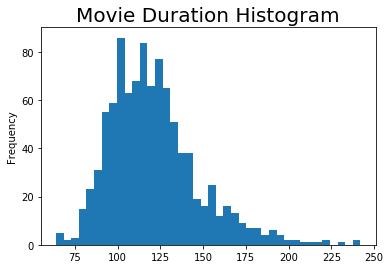

In [7]:
# Answer:
ax = movies.loc[:,'duration'].plot(kind = 'hist', bins = 40).set_title('Movie Duration Histogram', fontsize = 20);

#### Use a box plot to display that same data.

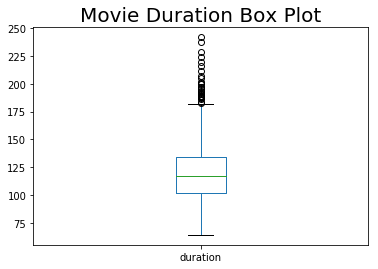

In [8]:
# Answer:
ax = movies.loc[:,'duration'].plot(kind = 'box').set_title('Movie Duration Box Plot', fontsize = 20);

## Intermediate level

#### Count how many movies have each of the content ratings.

In [9]:
# Answer:
ax = movies.loc[:,'content_rating'].value_counts()
ax

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

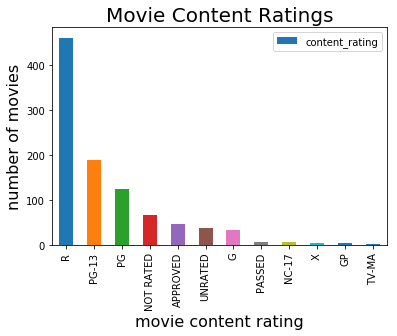

In [10]:
# Answer:
axes = ax.plot(kind='bar')
axes.set_title('Movie Content Ratings', fontsize=20)
axes.legend(loc=0)
axes.set_ylabel('number of movies', fontsize =16)
axes.set_xlabel('movie content rating', fontsize = 16);

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [11]:
# Answer:
ax.rename({'NOT RATED', 'APPROVED','PASSED', 'GP':'UNRATED' })

SyntaxError: invalid syntax (<ipython-input-11-058da6e1728d>, line 2)

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [12]:
# Answer:
{'content_ratings': {'X': 'NC-17', 'TV-MA': 'NC-17'}}


{'content_ratings': {'X': 'NC-17', 'TV-MA': 'NC-17'}}

#### Count the number of missing values in each column.

In [13]:
# Answer:
movies.loc[:, :].isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [14]:
# Answer:
movies.loc[:, 'content_rating'].value_counts(dropna=False) 
movies.loc[:, 'content_rating'].fillna(value='NOT RATED', inplace=True)

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [15]:
# Answer:
long_movie_rating = movies.loc[(movies['duration']>= 120), 'star_rating'].mean()
short_movie_rating = movies.loc[(movies['duration']< 120), 'star_rating'].mean()
print (long_movie_rating)
print (short_movie_rating)

7.948898678414097
7.838666666666665


#### Use a visualization to detect whether there is a relationship between duration and star rating.

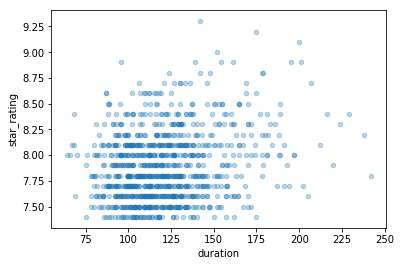

In [16]:
# Answer:
axes = movies.plot(kind='scatter', x='duration', y='star_rating', alpha =0.3)

#### Calculate the average duration for each genre.

In [17]:
# Answer: 
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

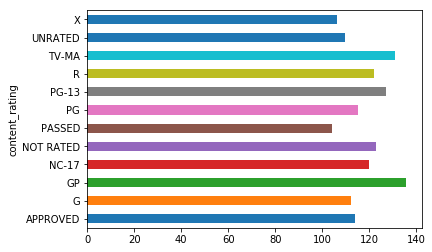

In [26]:
ax = movies.groupby('content_rating')['duration'].mean().plot(kind='barh', stacked = True)

#### Determine the top rated movie (by star rating) for each genre.

In [82]:
# Answer:

movies.groupby('genre')['star_rating', 'title'].max()


,star_rating,title
genre,,
Action,9.0,Yojimbo
Adventure,8.9,True Grit
Animation,8.6,Wreck-It Ralph
Biography,8.9,Walk the Line
Comedy,8.6,Zombieland
Crime,9.3,Zodiac
Drama,8.9,Zulu
Family,7.9,Willy Wonka & the Chocolate Factory
Fantasy,7.7,The City of Lost Children


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [52]:
movies.describe(include='object')

,title,content_rating,genre,actors_list
count,979,979,979,979
unique,975,12,16,969
top,Dracula,R,Drama,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,2,460,278,6


In [88]:
# Answer This first finds the duplicate titles:
movie_titles = movies.groupby('title').count()
duplicate_movies = movie_titles.loc[(movie_titles['star_rating']==2)]
duplicate_movies

,star_rating,content_rating,genre,duration,actors_list
title,,,,,
Dracula,2,2,2,2,2
Les Miserables,2,2,2,2,2
The Girl with the Dragon Tattoo,2,2,2,2,2
True Grit,2,1,2,2,2


In [89]:
# then we can look into the duplicate titles and see that they are no actually duplicates because they are different durations and star different actors. 
movies.set_index("title", inplace=True)
movies.loc[['Dracula', 'True Grit', 'The Girl with the Dragon Tattoo','Les Miserables' ]]

,star_rating,content_rating,genre,duration,actors_list
title,,,,,
Dracula,7.6,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
Dracula,7.5,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
True Grit,7.7,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
True Grit,7.4,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
The Girl with the Dragon Tattoo,7.9,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
The Girl with the Dragon Tattoo,7.8,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
Les Miserables,7.7,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
Les Miserables,7.5,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


In [124]:
movies.groupby('genre').mean()

# It's something like this: movies.loc[:, (movies.groupby('genre').count() > 10)]


,star_rating,duration
genre,,
Action,7.884559,126.485294
Adventure,7.933333,134.840000
Animation,7.914516,96.596774
Biography,7.862338,131.844156
Comedy,7.822436,107.602564
Crime,7.916935,122.298387
Drama,7.902518,126.539568
Family,7.850000,107.500000
Fantasy,7.700000,112.000000


**You only need to choose one of the options below.** However, solving for multiple options would count as "extra credit" that could e.g. raise your score from a 2 ("meets expectations") to a 3 ("exceeds expectations").

#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [136]:
# Answer:
genre_ratings = movies.groupby('genre')['star_rating'].mean()
genre_ratings



popular_bool = movies.loc[:, 'star_rating'] > 8
movies.loc[popular_bool, 'genre']


title
The Shawshank Redemption                                      Crime
The Godfather                                                 Crime
The Godfather: Part II                                        Crime
The Dark Knight                                              Action
Pulp Fiction                                                  Crime
12 Angry Men                                                  Drama
The Good, the Bad and the Ugly                              Western
The Lord of the Rings: The Return of the King             Adventure
Schindler's List                                          Biography
Fight Club                                                    Drama
The Lord of the Rings: The Fellowship of the Ring         Adventure
Inception                                                    Action
Star Wars: Episode V - The Empire Strikes Back               Action
Forrest Gump                                                  Drama
The Lord of the Rings: The Two Towers     

#### Option 4: aggregate by count and mean, then filter using the count

In [119]:
# Answer:



TypeError: Could not convert CrimeCrimeCrimeActionCrimeDramaWesternAdventureBiographyDramaAdventureActionActionDramaAdventureAdventureDramaDramaBiographyActionActionCrimeDramaCrimeDramaComedyWesternDramaCrimeComedyAnimationBiographyDramaDramaCrimeComedyActionActionMysteryHorrorCrimeDramaBiographyActionActionActionMysteryDramaComedyCrimeDramaDramaComedyDramaAdventureAnimationDramaHorrorDramaWesternComedyAnimationHorrorCrimeAnimationCrimeComedyDramaAdventureAnimationComedyAdventureDramaDramaDramaActionMysteryDramaCrimeCrimeActionAnimationActionDramaDramaAdventureCrimeDramaComedyDramaCrimeDramaCrimeComedyComedyDramaActionComedyCrimeBiographyActionAdventureDramaComedyDramaFilm-NoirComedyWesternDramaComedyMysteryComedyCrimeActionAdventureCrimeDramaAnimationActionWesternAdventureDramaCrimeActionBiographyBiographyAnimationDramaAdventureActionDramaAnimationDramaAdventureDramaActionDramaAdventureActionDramaAdventureDramaAdventureBiographyComedySci-FiDramaAnimationBiographyMysteryDramaComedyActionComedyCrimeComedyBiographyDramaDramaDramaAnimationHorrorDramaActionAdventureComedyDramaAnimationDramaCrimeBiographyCrimeDramaActionDramaCrimeCrimeActionCrimeAdventureDramaDramaCrimeComedyDramaDramaHorrorBiographyDramaComedyComedyDramaAnimationAnimationActionDramaActionBiographyActionCrimeCrimeBiographyDramaDramaAdventureDramaAdventureDramaComedyBiographyFilm-NoirDramaCrimeDramaAdventureDramaCrimeCrimeDramaDramaBiographyDramaAdventureDramaAdventureCrimeDramaDramaDramaCrimeDramaComedyDramaCrimeCrimeActionWesternDramaDramaActionActionAnimationDramaDramaMysteryAdventureComedyDramaActionMysteryDramaDramaComedyCrimeComedyComedyAnimationCrimeCrimeDramaBiographyActionDramaWesternMysteryComedyComedyDramaActionDramaDramaAdventureCrimeBiographyBiographyComedyActionAnimationCrimeDramaComedyActionComedyDramaDramaComedyBiographyComedyDramaDramaCrimeDramaMysteryComedyAnimationDramaActionCrimeComedyAdventureCrimeActionBiographyAnimationComedyAnimationComedyDramaAnimationAdventureAdventureDramaActionBiographyComedyComedyDramaHorrorDramaComedyDramaSci-FiHorrorDramaCrimeDramaDramaActionAdventureCrimeHorrorDramaAnimationAdventureDramaDramaAdventureDramaHistoryAdventureBiographyBiographyDramaAnimationDramaDramaBiographyDramaBiographyActionThrillerHorrorComedyHorrorActionDramaComedyAnimationComedyAdventureDramaDramaAdventureDramaDramaCrimeActionComedyAdventureCrimeComedyDramaDramaDramaDramaDramaAdventureDramaAnimationDramaActionAnimationComedyCrimeCrimeActionAnimationDramaActionDramaDramaActionDramaAdventureComedyAnimationDramaDramaDramaComedyBiographyActionDramaActionDramaHorrorDramaCrimeSci-FiActionBiographyActionCrimeCrimeAnimationDramaDramaAnimationBiographyAdventureActionWesternDramaBiographyAdventureCrimeCrimeDramaDramaAdventureDramaDramaDramaActionActionComedyCrimeActionCrimeDramaActionCrimeBiographyAnimationDramaAdventureBiographyBiographyDramaDramaBiographyComedyActionAnimationAdventureActionDramaDramaComedyComedyBiographyAnimationComedyDramaComedyComedyCrimeMysteryFamilyActionActionAnimationComedyDramaCrimeComedyDramaDramaCrimeAdventureComedyDramaCrimeComedySci-FiDramaComedyAnimationActionAnimationDramaActionCrimeCrimeAnimationCrimeThrillerFamilyAnimationDramaBiographyAnimationActionDramaDramaDramaCrimeDramaDramaActionAdventureDramaAnimationHorrorBiographyActionComedyActionAnimationComedyAdventureDramaAdventureDramaComedyDramaDramaComedyDramaActionDramaActionActionActionActionComedyBiographyAdventureDramaActionDramaAnimationComedyDramaDramaComedyComedyBiographyDramaCrimeBiographyAdventureActionComedyBiographyAdventureCrimeComedyDramaDramaBiographyBiographyDramaActionAdventureComedyCrimeActionActionBiographyActionCrimeHorrorActionBiographyDramaAdventureCrimeComedyBiographyComedyActionComedyMysteryComedyBiographyActionCrimeComedyDramaComedyActionDramaComedyDramaComedyCrimeComedyActionComedyDramaBiographyComedyDramaDramaAdventureDramaAnimationComedyDramaActionComedyComedyActionComedyComedyCrimeAnimationDramaActionDramaCrimeComedyActionCrimeAnimationBiographyBiographyDramaAdventureBiographyComedyDramaActionDramaDramaCrimeSci-FiFantasyComedyComedyComedyAdventureDramaDramaDramaComedyDramaCrimeActionComedyCrimeCrimeActionDramaHorrorAnimationAnimationAdventureDramaBiographyActionAdventureComedyAnimationDramaCrimeComedyComedyAnimationCrimeActionDramaDramaAnimationActionDramaCrimeDramaDramaDramaCrimeBiographyActionActionActionActionFilm-NoirHorrorDramaBiographyActionComedyComedyCrimeDramaComedyCrimeAdventureActionBiographyActionDramaHorrorWesternDramaDramaActionHorrorDramaComedyCrimeComedyAnimationComedyComedyDramaActionDramaComedyDramaDramaActionComedyCrimeBiographyActionAdventureThrillerActionCrimeDramaCrimeActionDramaComedyHorrorComedyComedyDramaActionComedyMysteryAnimationActionActionCrimeCrimeActionActionComedyDramaComedyActionAdventureDramaBiographyCrimeAdventureAnimationDramaCrimeDramaBiographyActionActionAnimationActionDramaHorrorDramaComedyComedyDramaDramaDramaBiographyDramaActionHorrorActionComedyBiographyComedyCrimeDramaCrimeActionBiographyAnimationDramaComedyComedyComedyAdventureDramaHorrorCrimeComedyCrimeDramaActionCrimeActionBiographyDramaComedyBiographyComedyActionDramaBiographyActionDramaAdventureActionDramaBiographyBiographyDramaAnimationComedyDramaCrimeBiographyBiographyCrimeDramaCrimeBiographyCrimeDramaActionCrimeDramaAnimationCrimeCrimeDramaComedyBiographyCrimeDramaCrimeAnimationDramaCrimeHorrorThrillerDramaComedyDramaAdventureAnimationDramaCrimeActionComedyActionDramaHorrorDramaDramaMysteryHorrorCrimeMysteryComedyComedyHorrorDramaActionDramaCrimeDramaDramaBiographyDramaComedyDramaComedyHorrorAnimationCrimeActionActionDramaDramaBiographyDramaComedyAdventureBiographyCrimeMysteryDramaActionDramaAdventureComedyAdventureDramaThrillerBiographyDramaHorrorActionCrimeActionAdventureDramaAdventureComedyHorrorDramaCrimeDramaDramaActionComedyCrimeComedyDramaDramaCrimeDramaDramaCrimeComedyComedyBiographyCrimeAdventureComedyComedyAdventureAdventureAdventureAnimationDramaComedyDramaComedyAdventureComedyDramaDramaDramaComedyComedyCrimeDramaComedyAdventureActionDramaComedyComedyDramaComedyComedyBiographyComedyActionBiographyMysteryAnimationActionDramaCrimeDramaComedyDramaDramaComedyAdventureActionHorrorCrime to numeric

## Bonus

#### Figure out something "interesting" using the actors data!